# Tutoriel 1 : Introduction à Pytorch & Réseau de neurones
***INF889G - Vision par ordinateur (UQÀM)***

*Adapté du [tutoriel 1](https://github.com/pjreddie/uwimg/blob/main/tutorial1%20-%20pytorch-introduction.ipynb) du cours CSE455 à l'Université de Washington (J. Redmon), qui a été adapté du tutoriel PyTorch : https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html*

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/joe-from-mtl/teaching/blob/main/notebooks/inf889g-vision/tuto1_intro_pytorch.ipynb)

In [ ]:
%matplotlib inline


# Tenseurs

Les tenseurs sont une structure de données spécialisée très similaire aux tableaux et matrices. Dans PyTorch, nous utilisons des tenseurs pour coder les entrées et sorties d'un modèle, ainsi que ses paramètres.

Les tenseurs sont similaires aux `ndarrays` de NumPy, sauf que les tenseurs peuvent s'exécuter sur GPU ou autre matériel spécialisé pour accélérer le calcul. Si vous connaissez `ndarrays`, vous serez à l'aise avec l'API `Tensor`. Si ce n'est pas le cas, suivez cette présentation rapide de l'API.

In [1]:
import torch
import numpy as np

## Initialisation d'un tenseur

Les tenseurs peuvent être initialisés de plusieurs façons. Considérez ces quelques exemples :

**Directement à partir des données**

Les tenseurs peuvent être créés directement à partir des données. Le type de données est déduit automatiquement.

In [2]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)
print(x_data)

tensor([[1, 2],
        [3, 4]])


**À partir d'un tableau NumPy**

Les tenseurs peuvent être créés à partir de tableaux NumPy (et vice versa).

In [3]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

**À partir d'un autre tenseur**

Le nouveau tenseur conserve les propriétés (forme, type de données) du tenseur fourni en argument, à moins qu'il ne soit explicitement remplacé.

In [5]:
x_ones = torch.ones_like(x_data) # converse les propriétés de x_data
print(f"Tenseurs de 1: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # remplace le type données de x_data
print(f"Tenseur aléatoire : \n {x_rand} \n")

Tenseurs de 1: 
 tensor([[1, 1],
        [1, 1]]) 

Tenseur aléatoire : 
 tensor([[0.2112, 0.8349],
        [0.0249, 0.9114]]) 



**Avec des valeurs aléatoires ou constantes**

``shape`` est un tuple de dimensions tensorielles. Dans les fonctions ci-dessous, il détermine la dimensionnalité du tenseur de sortie.

In [7]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Tenseur aléatoire : \n {rand_tensor} \n")
print(f"Tenseur de 1 : \n {ones_tensor} \n")
print(f"Tenseur de 0 : \n {zeros_tensor}")

Tenseur aléatoire : 
 tensor([[0.6470, 0.2919, 0.3063],
        [0.5787, 0.0333, 0.5988]]) 

Tenseur de 1 : 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Tenseur de 0 : 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


##  Propriétés d'un tenseur

Les propriétés (*attributes*) d'un tenseur décrivent leur forme, leur type de données et l'appareil (*device*) sur lequel ils sont stockés.


In [8]:
tensor = torch.rand(3,4)

print(f"Forme du tenseur : {tensor.shape}")
print(f"Type de données du tenseur : {tensor.dtype}")
print(f"Appareil où le tenseur est stocké : {tensor.device}")

Forme du tenseur : torch.Size([3, 4])
Type de données du tenseur : torch.float32
Appareil où le tenseur est stocké : cpu


## Opérations tensorielles

Plus de 100 opérations tensorielles, incluant la transposition, l'indexation, le tranchage, les opérations mathématiques, l'algèbre linéaire, l'échantillonnage aléatoire, et plus sont décrites en détail dans la [documentation de pytorch](https://pytorch.org/docs/stable/torch.html).

Chacun peut être exécuté sur GPU (à une vitesse généralement plus élevée que sur un CPU). Si vous utilisez Colab, allouez un GPU en accédant à `Edit > Notebook Settings`.

In [11]:
# Déplaçons le tenseur vers le GPU si disponible
if torch.cuda.is_available():
    tensor = tensor.to('cuda')

In [10]:
print(tensor)

tensor([[0.3080, 0.6362, 0.9307, 0.5878],
        [0.7606, 0.8277, 0.2703, 0.2636],
        [0.9931, 0.9803, 0.5186, 0.1719]])


Essayez quelques-unes des opérations de la liste. Si vous connaissez l'API NumPy, vous trouverez l'API `Tensor` facile à utiliser.

**Indexation et découpage (*slicing*) de type NumPy**

In [12]:
tensor = torch.ones(4, 4)
tensor[:,1] = 0
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


**Joindre des tenseurs**

Vous pouvez utiliser `torch.cat` pour concaténer une séquence de tenseurs le long d'une dimension donnée. Consultez aussi [`torch.stack`](https://pytorch.org/docs/stable/generated/torch.stack.html), une autre opération de combinaison de tenseurs qui est subtilement différence de `torch.cat`.

In [13]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


**Multiplier des tenseurs**

In [14]:
# Ceci calcul le produit élément par élément (*element-wise*)
print(f"tensor.mul(tensor) \n {tensor.mul(tensor)} \n")

# Syntaxe alternative :
print(f"tensor * tensor \n {tensor * tensor}")

tensor.mul(tensor) 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor * tensor 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


Ceci calcul la multiplication matricielle entre 2 tenseurs :

In [15]:
print(f"tensor.matmul(tensor.T) \n {tensor.matmul(tensor.T)} \n")

# Syntaxe alternative :
print(f"tensor @ tensor.T \n {tensor @ tensor.T}")

tensor.matmul(tensor.T) 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]]) 

tensor @ tensor.T 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])


**Projection d'un tenseur**

PyTorch déduira automatiquement comment gérer certaines opérations lorsque les tailles de tenseurs ne correspondent pas parfaitement. Dans cet exemple, vous pouvez multiplier un scalaire, une matrice de lignes ou une matrice de colonnes par une matrice 2d et obtenir le même résultat. C'est à la fois une fonctionnalité et un problème potentiel, car cela peut cacher des bogues si vous ne faites pas attention !

In [16]:
tones = torch.ones(4,2)
ttwos = 2 * tones
tworow = 2 * torch.ones(1,2)
twocol = 2 * torch.ones(4,1)
ttwos2 = tones * tworow
ttwos3 = tones * twocol

print(ttwos)
print(ttwos2)
print(ttwos3)

tensor([[2., 2.],
        [2., 2.],
        [2., 2.],
        [2., 2.]])
tensor([[2., 2.],
        [2., 2.],
        [2., 2.],
        [2., 2.]])
tensor([[2., 2.],
        [2., 2.],
        [2., 2.],
        [2., 2.]])


# Entraîner un réseau de neurones avec PyTorch

PyTorch est une bibliothèque d'apprentissage automatique puissante et largement utilisée. Il possède toutes les dernières couches et fonctions de réseau neuronal et prend en charge le calcul GPU.

De nos jours, la plupart des recherches sur les réseaux neuronaux s'effectuent avec PyTorch ou TensorFlow. *Google Research* développe TensorFlow tandis que *Facebook AI Research* développe PyTorch. Fonctionnellement, ils sont probablement très similaires, de façon anectodique beaucoup de gens qui utilisent PyTorch et il semble que ce soit un peu plus facile à apprendre pour les débutants. Il est important d'avoir une certaine expérience dans l'un de ces deux frameworks, mais si vous comprenez les idées et les concepts, vous ne devriez pas avoir trop de mal à passer de l'un à l'autre.

La bibliothèque `torch` fournit les fonctions de base dont nous avons besoin pour traiter les tenseurs. Les tenseurs sont une généralisation des matrices à des nombres arbitraires de dimensions (une matrice est un tenseur 2D). Types de tenseurs :

* 0 dimensionnel : Scalaire
* 1 dimensionnel : Vecteur
* 2 dimensionnel : Matrice
* 3 dimensionnel : Un cube de données, image en couleur
* 4 dimensionnel : Vidéo en couleur
* 5 dimensionnel : Espace-temps :)
* 6 dimensionnel : ???

In [18]:
import torch
import torchvision
import torchvision.transforms as transforms

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


## Données : MNIST

PyTorch a des outils intégrés pour télécharger et charger des ensembles de données communs. Nous allons jouer avec MNIST dans cet exemple. Il s'agit d'un ensemble de données de taille 28x28 de chiffres manuscrits en niveaux de gris de 0 à 9. Il y a 60 000 images dans l'ensemble d'apprentissage et 10 000 dans l'ensemble de test.

In [19]:
def get_mnist_data():
    trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True,
                                        transform=transforms.ToTensor())
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True,
                                            num_workers=8)

    testset = torchvision.datasets.MNIST(root='./data', train=False, download=True,
                                      transform=transforms.ToTensor())
    testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False,
                                          num_workers=8)
    classes = range(10)
    return {'train': trainloader, 'test': testloader, 'classes': classes}

data = get_mnist_data()

0it [00:00, ?it/s]

Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw


0it [00:00, ?it/s]

Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw


0it [00:00, ?it/s]

Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw


0it [00:00, ?it/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw
Processing...
Done!


In [20]:
print(data['train'].__dict__)

{'dataset': Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor(), 'num_workers': 8, 'pin_memory': False, 'timeout': 0, 'worker_init_fn': None, '_DataLoader__multiprocessing_context': None, '_dataset_kind': 0, 'batch_size': 32, 'drop_last': False, 'sampler': <torch.utils.data.sampler.RandomSampler object at 0x0000018B42F819A0>, 'batch_sampler': <torch.utils.data.sampler.BatchSampler object at 0x0000018B42F98AC0>, 'collate_fn': <function default_collate at 0x0000018B41BCC4C0>, '_DataLoader__initialized': True, '_IterableDataset_len_called': None}


### Comprendre nos données
Il vaut la peine de vérifier comment notre chargeur de données charge les images dans les tenseurs. Nous pouvons imprimer la taille des données chargées dans les tenseurs `images`.

In [33]:
# Obtenir des images d'entraînement aléatoire
dataiter = iter(data['train'])
images, labels = next(dataiter)
print(images.size())

torch.Size([32, 1, 28, 28])


Le tenseur `images` est 4-dimensionnel (32 x 1 x 28 x 28)

PyTorch stocke les données d'image au format (N x C x H x W). Ainsi, la taille de ce tenseur implique que nous avons un mini-lot de 32 images, chacune ayant un seul canal (niveaux de gris), et chaque image est de 28 x 28, donc c'est logique !

Nous pouvons utiliser matplotlib pour voir à quoi ressemblent nos données :

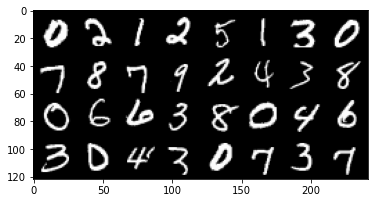

Étiquettes :        0         2         1         2         5         1         3         0
torch.Size([32, 1, 28, 28])
torch.Size([32, 784])


In [22]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Afficher les images
imshow(torchvision.utils.make_grid(images))

# Imprimer les étiquettes (labels)
print("Étiquettes :" + ' '.join('%9s' % data['classes'][labels[j]] for j in range(8)))


flat = torch.flatten(images, 1)
print(images.size())
print(flat.size())


## Un réseau simple

Nous allons d'abord construire un réseau de neurones très basique avec une seule couche cachée de neurones (*hidden layer*). Cela signifie qu'une couche de poids entièrement connectée (*fully connected layer*) connecte l'entrée aux neurones cachés et qu'une couche entièrement connectée connecte les neurones cachés à la sortie. Nous utiliserons la fonction d'activation RELU sur les valeurs de neurones cachés comme notre non-linéarité.

Ces couches entièrement connectées (ou `nn.Linear`) attendent un tenseur d'entrée 2D de taille N x I où N est le nombre de points de données dans un mini lot et I est le nombre d'entrées. Cependant, nos données sont formatées en (N x C x H x W) pour le moment, nous devons donc dire à PyTorch de les réorganiser en utilisant `torch.flatten`.

Après l'application de `flatten`, les données passent d'une forme (32 x 1 x 28 x 28) à (32 x 784)

In [23]:
import torch.nn as nn
import torch.nn.functional as F


class SimpleNet(nn.Module):
    def __init__(self, inputs=28*28, hidden=512, outputs=10):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(inputs, hidden)
        self.fc2 = nn.Linear(hidden, outputs)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)  # fonction d'activation : précision 92.4% -> 98.6%
        x = self.fc2(x)
        return x


### La fonction d'entraînement

Passons maintenant à l'entraînement du réseau. Notre fonction `train` prend en entrée le `net` à entraîner et le `dataloader` pour les données d'apprentissage. Il faut également fournir certains paramètres optionnels pour contrôler l'apprentissage.

Pour notre réseau, nous utiliserons le `nn.CrossEntropyLoss` intégré à PyTorch. Cela appliquera un softmax à la sortie de notre réseau, calculera la probabilité logarithmique attribuée à chaque classe, puis essaiera de minimiser la vraisemblance logarithmique négative de nos données (AKA maximiser la vraisemblance)

Pour notre optimiseur, nous utilisons une descente de gradient stochastique avec des paramètres de taux d'apprentissage (*learning rate*), une intertie (*momuntum*) et de décroissance (*decay*).

In [24]:
import torch.optim as optim

def train(net, dataloader, epochs=1, lr=0.01, momentum=0.9, decay=0.0, verbose=1):
    net.to(device)
    losses = []
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=lr, momentum=momentum, weight_decay=decay)
    for epoch in range(epochs):
        sum_loss = 0.0
        for i, batch in enumerate(dataloader, 0):
            # Obtenir les entrées; les données forme une liste de [inputs, labels]
            inputs, labels = batch[0].to(device), batch[1].to(device)

            # Initialiser les paramètres des gradients à zéro
            optimizer.zero_grad()

            # Propagation avant (forward) + Rétropropagation (backward) + Optimisation 
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()  # autograd magic ! Calcule toutes les dérivées partielles
            optimizer.step() # Effectue un pas dans la direction du gradient

            # Affiche des statistiques
            losses.append(loss.item())
            sum_loss += loss.item()
            if i % 100 == 99:    # Affiche chaque 100 mini-batches
                if verbose:
                    print('[%d, %5d] loss: %.3f' %
                         (epoch + 1, i + 1, sum_loss / 100))
                sum_loss = 0.0
    return losses

### Entraîner le réseau

Nous allons instancier un nouveau réseau et l'entraîner sur nos données d'entraînement.

Notre fonction d'entraînement imprime des informations de débogage sur l'époque, le numéro de lot et les valeurs de perte actuelles. Il renvoie également une liste de toutes les pertes sur nos mini-lots afin que nous puissions les tracer une fois la formation terminée.

[1,   100] loss: 1.383
[1,   200] loss: 0.523
[1,   300] loss: 0.404
[1,   400] loss: 0.365
[1,   500] loss: 0.314
[1,   600] loss: 0.322
[1,   700] loss: 0.281
[1,   800] loss: 0.275
[1,   900] loss: 0.273
[1,  1000] loss: 0.256
[1,  1100] loss: 0.244
[1,  1200] loss: 0.238
[1,  1300] loss: 0.258
[1,  1400] loss: 0.231
[1,  1500] loss: 0.238
[1,  1600] loss: 0.204
[1,  1700] loss: 0.211
[1,  1800] loss: 0.210


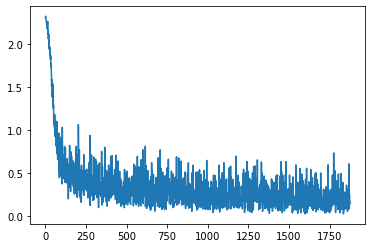

In [25]:
net = SimpleNet()

losses = train(net, data['train'])
plt.plot(losses)

## Tester le réseau

Nous avons entraîné notre premier réseau de neurones ! La perte a diminué ! C'est bien, non ? Mais quelle est la qualité de notre réseau, exactement ?

Eh bien, nous pouvons essayer d'exécuter notre réseau sur quelques-unes de nos images de test et voir ce qui se passe :

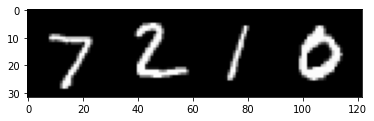

Vérité de terrain (GroundTruth):      7     2     1     0
Prédiction :      7     2     1     0


In [27]:
dataiter = iter(data['test'])
images, labels = next(dataiter)

images = images[:4]
labels = labels[:4]

# Afficher les images
imshow(torchvision.utils.make_grid(images))
print('Vérité de terrain (GroundTruth): ', ' '.join('%5s' % data['classes'][labels[j]] for j in range(4)))
outputs = net(images.to(device))
_, predicted = torch.max(outputs, 1)

print('Prédiction : ', ' '.join('%5s' % data['classes'][predicted[j]]
                              for j in range(4)))

Assez bon jusqu'à présent. Mais nous voulons aussi pouvoir tester le réseau sur l'ensemble de nos données. Voici une fonction qui peut faire exactement cela, en calculant la précision (*accuracy*) sur un ensemble complet de données :

In [28]:
def accuracy(net, dataloader):
    correct = 0
    total = 0
    with torch.no_grad():
        for batch in dataloader:
            images, labels = batch[0].to(device), batch[1].to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct/total

Maintenant, nous pouvons essayer :

In [30]:
print(f"Précision actuelle : {accuracy(net, data['train']) * 100:.04f} %")

Précision actuelle : 94.9217 %


## Expérimentations

Il est maintenant temps d'expérimenter un peu avec nos modèles. Tout d'abord, voici une fonction utilitaire qui fait le lissage des données pour nous. Comme vous l'avez peut-être remarqué, nous effectuons une descente de gradient *stochastique*, de sorte que nos pertes pour chaque mini-lot peuvent varier considérablement. Si nous les lissons un peu, ils seront plus faciles à regarder lorsque nous les traçons.

In [31]:
def smooth(x, size):
    return np.convolve(x, np.ones(size)/size, mode='same')

### Taux d'apprentissage (*Learning Rate*)

Expérimentons avec le taux d'apprentissage de notre modèle. La modification du taux d'apprentissage devrait affecter la vitesse de convergence de notre modèle et sa précision. Nous pouvons voir l'effet lorsque nous traçons la fonction de perte au fil du temps pour des modèles avec différents taux d'apprentissage :

[1,   100] loss: 0.756
[1,   200] loss: 0.363
[1,   300] loss: 0.299
[1,   400] loss: 0.272
[1,   500] loss: 0.240
[1,   600] loss: 0.230
[1,   700] loss: 0.231
[1,   800] loss: 0.194
[1,   900] loss: 0.200
[1,  1000] loss: 0.209
[1,  1100] loss: 0.200
[1,  1200] loss: 0.175
[1,  1300] loss: 0.190
[1,  1400] loss: 0.197
[1,  1500] loss: 0.161
[1,  1600] loss: 0.171
[1,  1700] loss: 0.164
[1,  1800] loss: 0.145
[1,   100] loss: 1.376
[1,   200] loss: 0.521
[1,   300] loss: 0.425
[1,   400] loss: 0.396
[1,   500] loss: 0.341
[1,   600] loss: 0.310
[1,   700] loss: 0.294
[1,   800] loss: 0.290
[1,   900] loss: 0.277
[1,  1000] loss: 0.265
[1,  1100] loss: 0.246
[1,  1200] loss: 0.257
[1,  1300] loss: 0.236
[1,  1400] loss: 0.231
[1,  1500] loss: 0.227
[1,  1600] loss: 0.195
[1,  1700] loss: 0.203
[1,  1800] loss: 0.202
[1,   100] loss: 2.217
[1,   200] loss: 1.965
[1,   300] loss: 1.650
[1,   400] loss: 1.314
[1,   500] loss: 1.062
[1,   600] loss: 0.890
[1,   700] loss: 0.765
[1,   800] 

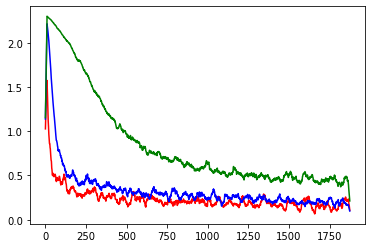

In [32]:
net_high = SimpleNet()
losses_high = train(net_high, data['train'], lr=.1, verbose=1)
acc_high = accuracy(net_high, data['test'])
plt.plot(smooth(losses_high,20), 'r-')


net_mid = SimpleNet()
losses_mid = train(net_mid, data['train'], lr=.01, verbose=1)
acc_mid = accuracy(net_mid, data['test'])
plt.plot(smooth(losses_mid,20), 'b-')


net_low = SimpleNet()
losses_low = train(net_low, data['train'], lr=.001, verbose=1)
acc_low = accuracy(net_low, data['test'])
plt.plot(smooth(losses_low,20), 'g-')

print(acc_high, acc_mid, acc_low)

### Inertie (*Momentum*)

Nous utilisons la valeur par défaut pour l'inertie de `0.9`. Fixez votre valeur pour le taux d'apprentissage et essayez de varier les valeurs pour le `momentum`.

In [ ]:
# Écrivez votre code ici pour expérimenter différentes valeurs de momentum.

### Décroissance des poids (*Weight Decay*)

Pour l'instant, nous n'utilisons aucune décroissance des poids avec notre modèle. Cependant, cela peut être utile comme méthode de régularisation si nous craignons un sur-ajustement.

In [ ]:
# Écrivez votre code ici pour expérimenter différentes valeurs de weight decay. 

### Un modèle plus grand

Avant, nous utilisions un modèle très simple, mais il est maintenant temps d'essayer d'ajouter un peu de complexité. Créez un réseau qui prend en entrée l'image 28x28, 10 sorties et n'importe quel nombre de couches tant qu'il a moins de 2 000 000 connexions. Notre réseau simple avait auparavant 784\*512 + 512\*10 = 406 528 connexions.

N'utilisez que des couches entièrement connectées (`nn.Linear`) (nous verrons bientôt d'autres types de couches). Cependant, jouez avec différentes [fonctions d'activation](https://pytorch.org/docs/stable/nn.functional.html#non-linear-activation-functions), [pertes](https://pytorch.org/ docs/stable/nn.html#loss-functions) et les valeurs des hyperparamètres. Vous pouvez également essayer différents régimes d'entraînement. Par exemple, vous pouvez essayer de réduire le taux d'apprentissage pendant l'entraînement en appelant notre méthode d'entraînement deux fois comme ceci :

```python
train(net, data['train'], epochs=5, lr=.1)
train(net, data['train'], epochs=3, lr=.01)
train(net, data['train'], epochs=2, lr=.001)
```

Peut-être que ça fonctionne mieux ? Pourquoi ai-je choisi ces valeurs en particulier ? Qui sait! Faire de l'apprentissage profond est entre art et expérience, il suffit d'essayer des choses et de voir ce qui fonctionne.

Expérimentez avec différentes architectures et paramètres de réseau pour obtenir le modèle le plus précis.

In [ ]:
# Écrivez votre nouveau modèle et faites vos expérimentations ici.

class ExperiNet(nn.Module):
    def __init__(self):
        super(ExperiNet, self).__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return x